In [10]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# August 2024
# License: MIT

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, :2]  # Take only the first two features
y = iris.target
class_labels = iris.target_names

# Filter for setosa and versicolor flowers
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [14]:
print(f'Training accuracy: {model.score(X_train, y_train):.4f}')
print(f'Test accuracy: {model.score(X_test, y_test):.4f}')

Training accuracy: 0.9867
Test accuracy: 1.0000


In [15]:
model = LinearSVC(C=1e10, random_state=42)
model.fit(X_train, y_train)

LinearSVC(C=10000000000.0, random_state=42)

In [16]:
print(f'Training accuracy: {model.score(X_train, y_train):.4f}')
print(f'Test accuracy: {model.score(X_test, y_test):.4f}')

Training accuracy: 1.0000
Test accuracy: 1.0000


In [17]:
def plot_svc_decision_function(model, ax=None, plot_support_vectors=True):
    ax = ax or plt.gca()
    
    # Create grid to evaluate model    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.column_stack([XX.ravel(), YY.ravel()])
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, 
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support_vectors and hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
            linewidth=1, color='none', edgecolors='k', label='support vectors') 

In [31]:
def plot_svm_decision_boundary(model, X, y, feature_names=None, class_labels=None, ax=None):
    """Plot the decision boundary, margin, and support vectors of an SVM classifier."""
    if feature_names is None:
        feature_names = ['$x$', '$y$']
    if class_labels is None:
        class_labels = ['Class 0', 'Class 1']
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', s=50, edgecolors='k', label=class_labels[0])
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', s=50, edgecolors='k', label=class_labels[1])
    
    # Create grid to evaluate model
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 250),
        np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 250)
    )
    grid = np.c_[x0.ravel(), x1.ravel()]

    # Plot the decision boundary and margins
    y_decision = model.decision_function(grid).reshape(x0.shape)
    ax.contour(x0, x1, y_decision, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Fill the class areas
    y_pred = model.predict(grid).reshape(x0.shape)
    custom_cmap = plt.cm.colors.ListedColormap(['red', 'blue'])
    ax.contourf(x0, x1, y_pred, alpha=0.3, cmap=custom_cmap)
    
    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                   facecolors='none', edgecolors='black') 

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.legend()

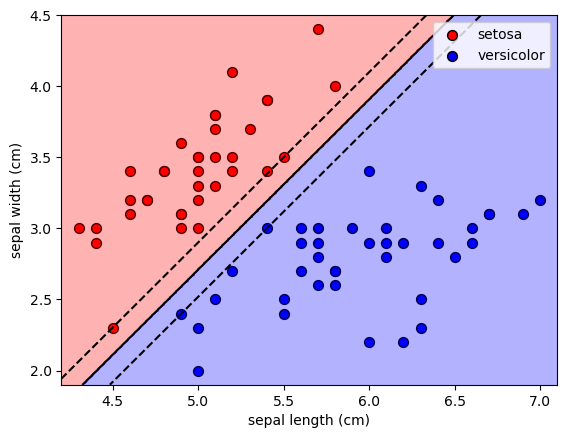

In [32]:
plot_svm_decision_boundary(model, X_train, y_train, iris.feature_names, class_labels)